**AUTHORS: Suman Lohit, I-ching Wang**

# Classification: BANK MARKETING DATASET

Abstract: The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. (source: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing ). The classification goal is to predict if the client will subscribe to a term deposit (variable y) or not. 

The dataset we are using has 5000 rows and 21 columns including the target variable. Here is a brief description of the features of the dataset:
1. age (numeric)
2. job : type of job (categorical:"admin.","bluecollar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed")
3. marital : marital status 
(categorical: "divorced","married","single"; note: "divorced" means divorced or widowed)
4. education
(categorical:"basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree")
5. default: has credit in default? (categorical: "no","yes")
6. housing: has housing loan? (categorical: "no","yes")
7. loan: has personal loan? (categorical: "no","yes")
   
   Related with the last contact of the current campaign:
8. contact: contact communication type 
(categorical: "cellular","telephone") 
9. month: last contact month of year 
(categorical: "mar", ..., "nov", "dec")
10. day_of_week: last contact day of the week 
(categorical: "mon","tue","wed","thu","fri")
11. duration: last contact duration, in seconds (numeric). Important note: The duration is not known before a call is performed. Also, after the end of the call y is obviously known. 
   
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
      social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)     
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: "yes","no")



In [13]:
import pandas as pd
import numpy as np

We are using the preprocessed Bank dataset from Project 1. All the null values have been filled and the data has been transformed to make them suitable for Machine Learning. 

We run all the models from Project 1 again and store the results in a Dataframe. After that we move on to Ensemble models, PCA models and Deep Learning model.

In [14]:
bank = pd.read_csv("preprocessed_bank.csv", index_col=0)


In [15]:
bank.head()

,age,education,housing,loan,month,day_of_week,campaign,pdays,previous,emp.var.rate,...,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56.0,0,0,1,2,0,1.0,999.0,0.0,1.1,...,0,0,1,0,0,1,0,0,1,0
1,35.0,1,1,1,2,0,1.0,999.0,0.0,1.1,...,0,0,1,0,0,1,0,0,1,0
2,54.0,0,0,1,2,0,1.0,999.0,0.0,1.1,...,0,1,0,0,0,1,0,0,1,0
3,55.0,0,1,1,2,0,1.0,999.0,0.0,1.1,...,0,0,1,0,0,1,0,0,1,0
4,32.0,2,1,1,2,0,1.0,999.0,0.0,1.1,...,0,0,1,0,0,1,0,0,1,0


In [16]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   5000 non-null   float64
 1   education             5000 non-null   int64  
 2   housing               5000 non-null   int64  
 3   loan                  5000 non-null   int64  
 4   month                 5000 non-null   int64  
 5   day_of_week           5000 non-null   int64  
 6   campaign              5000 non-null   float64
 7   pdays                 5000 non-null   float64
 8   previous              5000 non-null   float64
 9   emp.var.rate          5000 non-null   float64
 10  cons.price.idx        5000 non-null   float64
 11  cons.conf.idx         5000 non-null   float64
 12  euribor3m             5000 non-null   float64
 13  nr.employed           5000 non-null   float64
 14  y                     5000 non-null   int64  
 15  job_admin.           

# Data Split

X and Y datasets are split into training and test datasets individually. We use a MinMaxScaler to transform the features to avoid any distortions.

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

We split the Preprocessed data into Target (Y) and feature (X) datasets

In [18]:
colIndexes= bank.drop(['y'], axis=1).columns
X= bank[colIndexes]
Y= bank.y

In [19]:
import random
random.seed(0)
X_train_org, X_test_org, Y_train, Y_test= train_test_split(X,Y,random_state=0)
scaler= MinMaxScaler()
X_train= scaler.fit_transform(X_train_org)
X_test= scaler.transform(X_test_org)

## Classification Models

We now build various Classification Models paired with a Gridsearch Cross validation to find the optimal hyperparameters. 

Proclaiming most data points to be 'no' would give us a good accuracy, however, it is not helpful. We should focus on identifying the 'yes' outcomes correctly.
Since we are more concerned with finding most 'yes' values correctly even if it means a few 'no's are falsely classified as 'yes', our evaluation criterion is going to be **"RECALL"**

In [20]:
# Creating an empty DataFrame for the model results.

results_recall_df = pd.DataFrame(columns=['model','test_score','recall_score'])

## KNN

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import StratifiedKFold


random.seed(0)

grid_params= {'n_neighbors': [3,4,5,8,10,15,20],'weights':['distance'],'metric':['euclidean']}

gs_knn= GridSearchCV(KNeighborsClassifier(), grid_params, cv= StratifiedKFold(n_splits=5,random_state=0, shuffle=True) ,scoring = 'recall',return_train_score=True, verbose=1)
gs_results= gs_knn.fit(X_train, Y_train)
print("Best parameters: {}".format(gs_results.best_params_))
print("Best cross-validation score: {:.2f}".format(gs_results.best_score_))

gs_best_knn = KNeighborsClassifier(n_neighbors = gs_results.best_params_['n_neighbors'],metric=gs_results.best_params_['metric'],weights=gs_results.best_params_['weights'])
gs_best_knn.fit(X_train,Y_train)
print(f'test score : {gs_best_knn.score(X_test, Y_test)}')
knn_Y_predict = gs_best_knn.predict(X_test)
print('Recall :{}'.format(recall_score(Y_test,knn_Y_predict)))

#results = pd.DataFrame(gs_knn.cv_results_)

results_recall_df =  results_recall_df.append({'model':'knn','test_score':gs_best_knn.score(X_test, Y_test),'recall_score':recall_score(Y_test,knn_Y_predict)},ignore_index=True)



Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
Best cross-validation score: 0.55
test score : 0.7056
Recall :0.5931558935361216


The Cross-validation score of this model is 0.55 and Recall score is 0.59. 

## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
import warnings

grid_params= {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['lbfgs','saga',] }

Logreg = GridSearchCV(LogisticRegression(), param_grid = grid_params, cv = 5, n_jobs=-1, scoring= 'recall')
warnings.filterwarnings('ignore')


best_logreg = Logreg.fit(X_train, Y_train)
print("Best parameters: {}".format(Logreg.best_params_))
print("Best cross-validation score: {:.2f}".format(Logreg.best_score_))
# Logreg.cv_results_

Best parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score: 0.65


In [23]:
logL2= LogisticRegression(penalty= Logreg.best_params_['penalty'], C= Logreg.best_params_['C'], solver= Logreg.best_params_['solver'])
logL2.fit(X_train, Y_train)
print('train_score_l2 : {}'.format(logL2.score(X_train, Y_train)))
print('test_score_l2 : {}'.format(logL2.score(X_test, Y_test)))

Logreg_Y_predict = logL2.predict(X_test)
print('Recall :{:.4f}'.format(recall_score(Y_test,Logreg_Y_predict)))

results_recall_df = results_recall_df.append({'model':'logistic_regression','test_score':logL2.score(X_test, Y_test),'recall_score':recall_score(Y_test,Logreg_Y_predict)},ignore_index=True)



train_score_l2 : 0.7114666666666667
test_score_l2 : 0.6992
Recall :0.6426


The best parameters for Logistic Regression model is C= 0.01, penalty= l1, solver= saga. When we run the model with these parameters, we get a Recall score of 0.64. We notice here that we have a better recall rate compared to that of KNN classifier.

## Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

grid_params ={'criterion': ['gini', 'entropy'], 'max_depth': [2,5,7], 'min_samples_leaf':[5,10,15],  'random_state': [0]}

clf_tree = GridSearchCV(DecisionTreeClassifier(), param_grid = grid_params, cv = 5, n_jobs=-1, scoring= 'recall')

best_tree = clf_tree.fit(X_train, Y_train)
print("Best parameters: {}".format(clf_tree.best_params_))
print("Best cross-validation score: {:.2f}".format(clf_tree.best_score_))



Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'random_state': 0}
Best cross-validation score: 0.56


In [25]:
tree = DecisionTreeClassifier(**clf_tree.best_params_)
tree.fit(X_train, Y_train)

print("Train score: {:.4f}".format(tree.score(X_train, Y_train)))
print("Test score: {:.4f}".format(tree.score(X_test,Y_test)))

tree_Ypredict = tree.predict(X_test)
print('Recall :{:.4f}'.format(recall_score(Y_test,tree_Ypredict)))

results_recall_df = results_recall_df.append({'model':'decision_tree','test_score':tree.score(X_test,Y_test),'recall_score':recall_score(Y_test,tree_Ypredict)},ignore_index=True)


Train score: 0.7683
Test score: 0.7576
Recall :0.5913


The best parameters obtained from the Grid Search are: criterion= 'entropy', max_depth= 5, min_samples_leaf= 10. The cross-validation score is 0.56 The decicion tree model run with these parameters provides a Recall score of 0.59.

In [26]:
bank.shape

(5000, 35)

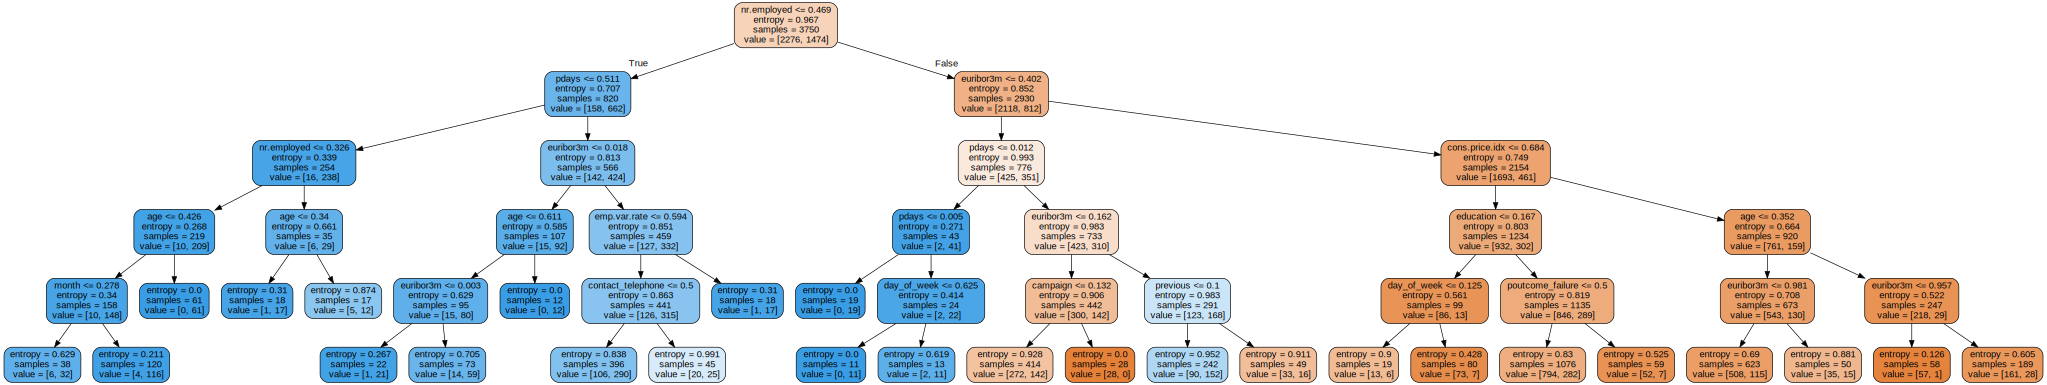

In [27]:
import os
import graphviz
# Create DOT data
from sklearn.tree import export_graphviz

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'


dot_data = export_graphviz(tree, out_file=None, filled=True, rounded=True, feature_names= X.columns) 
# Draw graph
graph = graphviz.Source(dot_data) 

# Show graph
graph 

The decision tree model first splits the tree on "nr.employed" and the second split on "emp.var.rate" and "poutcome_success". Entropy measures the impurity of every node. Samples are the number of records that are reaching that particular node. Orange colored nodes represent nodes that contain majority of the samples that have 'no' as the 'y' outcome. Blue nodes indicate that majority of the its samples have 'yes' as the outcome.  

In [28]:
from mlxtend.plotting import plot_decision_regions, category_scatter



## Linear SVC

In [29]:
from sklearn.svm import LinearSVC

grid_params= {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100, 1000], 'random_state': [0] }

clf_lsvc = GridSearchCV(LinearSVC(), param_grid = grid_params, cv = 5, n_jobs=-1, scoring= 'recall')

best_lsvc = clf_lsvc.fit(X_train, Y_train)
print("Best parameters: {}".format(clf_lsvc.best_params_))
print("Best cross-validation score: {:.2f}".format(clf_lsvc.best_score_))

Best parameters: {'C': 1000, 'penalty': 'l2', 'random_state': 0}
Best cross-validation score: 0.75


In [30]:
clf_ls= LinearSVC(penalty= clf_lsvc.best_params_['penalty'], C= clf_lsvc.best_params_['C'], random_state= clf_lsvc.best_params_['random_state'])
clf_ls.fit(X_train, Y_train)
print('train_score_l2 : {}'.format(clf_ls.score(X_train, Y_train)))
print('test_score_l2 : {}'.format(clf_ls.score(X_test, Y_test)))

clf_ls_Ypredict = clf_ls.predict(X_test)
print('Recall :{:.4f}'.format(recall_score(Y_test,clf_ls_Ypredict)))

results_recall_df = results_recall_df.append({'model':'linear_svc','test_score':clf_ls.score(X_test, Y_test),'recall_score':recall_score(Y_test,clf_ls_Ypredict)},ignore_index=True)


train_score_l2 : 0.6509333333333334
test_score_l2 : 0.6504
Recall :0.6730


Gridsearch with Linear SVC provides the following as best parameters: C= 1000, penalty= l2. The model run with these two parameters give a test score of 0.75 and a Recall score of 0.67.  

## SVC with kernel

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score

In [32]:
# kernel= poly

grid_params ={'kernel': ['poly'], 'C': [0.1,0.3], 'degree':[2,3,4],  'gamma': [0.1,0.3]}

clf_poly = GridSearchCV(SVC(random_state=0), param_grid = grid_params, cv = 5, scoring= 'recall',verbose=True)

clf_poly.fit(X_train, Y_train)

print("Best parameters: {}".format(clf_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(clf_poly.best_score_))

clf_bestpoly = SVC(**clf_poly.best_params_)
clf_bestpoly.fit(X_train,Y_train)

print('train_score_l2 : {}'.format(clf_bestpoly.score(X_train, Y_train)))
print('test_score_l2 : {}'.format(clf_bestpoly.score(X_test, Y_test)))

clf_bestpoly_Ypredict = clf_bestpoly.predict(X_test)
print('Recall :{:.4f}'.format(recall_score(Y_test,clf_bestpoly_Ypredict)))

results_recall_df = results_recall_df.append({'model':'kernel_poly_svc','test_score':clf_bestpoly.score(X_test, Y_test),'recall_score':recall_score(Y_test,clf_bestpoly_Ypredict)},ignore_index=True)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 0.1, 'degree': 4, 'gamma': 0.1, 'kernel': 'poly'}
Best cross-validation score: 0.67
train_score_l2 : 0.7389333333333333
test_score_l2 : 0.7376
Recall :0.6958


We notice that SVC With kernel 'poly', degree '4' and C = 0.1 and gamma 0.1 provides the best Recall score of the available models at 0.70. 

In [33]:
#kernel= rbf
grid_params ={'kernel': ['rbf'], 'C': [0.1,0.3], 'degree':[2,3,4],  'gamma': [0.1,0.3]}

clf_rbf = GridSearchCV(SVC(random_state=0), param_grid = grid_params, cv = 5, scoring= 'recall',verbose=True)

clf_rbf.fit(X_train, Y_train)

print("Best parameters: {}".format(clf_rbf.best_params_))
print("Best cross-validation score: {:.2f}".format(clf_rbf.best_score_))

clf_bestrbf = SVC(**clf_rbf.best_params_)
clf_bestrbf.fit(X_train,Y_train)

print('train_score_l2 : {}'.format(clf_bestrbf.score(X_train, Y_train)))
print('test_score_l2 : {}'.format(clf_bestrbf.score(X_test, Y_test)))

clf_bestrbf_Ypredict = clf_bestrbf.predict(X_test)
print('Recall :{:.4f}'.format(recall_score(Y_test,clf_bestrbf_Ypredict)))

results_recall_df = results_recall_df.append({'model':'kernel_rbf_svc','test_score':clf_bestrbf.score(X_test, Y_test),'recall_score':recall_score(Y_test,clf_bestrbf_Ypredict)},ignore_index=True)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.62
train_score_l2 : 0.7570666666666667
test_score_l2 : 0.7496
Recall :0.6236


SVC With kernel 'rbf', degree '2' and C = 0.1 and gamma 0.1 provides Recall score of 0.62. 

In [34]:
#kernel= linear
grid_params ={'kernel': ['linear'], 'C': [0.1,0.3], 'degree':[2,3,4],  'gamma': [0.1,0.3]}

clf_lin = GridSearchCV(SVC(random_state=0), param_grid = grid_params, cv = 5, scoring= 'recall',verbose=True)

clf_lin.fit(X_train, Y_train)

print("Best parameters: {}".format(clf_lin.best_params_))
print("Best cross-validation score: {:.2f}".format(clf_lin.best_score_))

clf_bestlin = SVC(**clf_lin.best_params_)
clf_bestlin.fit(X_train,Y_train)

print('train_score_l2 : {}'.format(clf_bestlin.score(X_train, Y_train)))
print('test_score_l2 : {}'.format(clf_bestlin.score(X_test, Y_test)))

clf_bestlin_Ypredict = clf_bestlin.predict(X_test)
print('Recall :{:.4f}'.format(recall_score(Y_test,clf_bestlin_Ypredict)))

results_recall_df = results_recall_df.append({'model':'kernel_linear_svc','test_score':clf_bestlin.score(X_test, Y_test),'recall_score':recall_score(Y_test,clf_bestlin_Ypredict)},ignore_index=True)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}
Best cross-validation score: 0.51
train_score_l2 : 0.7512
test_score_l2 : 0.736
Recall :0.5057


We notice that SVC With kernel 'linear', degree '2' and C = 0.1 and gamma 0.1 provides a Recall score 0.51. 

## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve

grid_params ={'n_estimators': [100, 200, 500], 'max_depth': [2,4,6], 'min_samples_leaf':[5,10],  'random_state': [0], 'max_features' : [2]}

rf = GridSearchCV(RandomForestClassifier(), param_grid = grid_params, cv = 5, n_jobs=-1, scoring= 'recall')

rf.fit(X_train, Y_train)
print("Best parameters: {}".format(rf.best_params_))
print("Best cross-validation score: {:.2f}".format(rf.best_score_))

RForest= RandomForestClassifier(**rf.best_params_)
RForest.fit(X_train, Y_train)

print("Train score: {:.4f}".format(RForest.score(X_train, Y_train)))
print("Test score: {:.4f}".format(RForest.score(X_test, Y_test)))

RForest_Ypredict = RForest.predict(X_test)
print('Recall :{:.4f}'.format(recall_score(Y_test, RForest_Ypredict)))
results_recall_df = results_recall_df.append({'model':'random_forest','test_score':RForest.score(X_test, Y_test),'recall_score':recall_score(Y_test,RForest_Ypredict)},ignore_index=True)


Best parameters: {'max_depth': 6, 'max_features': 2, 'min_samples_leaf': 10, 'n_estimators': 100, 'random_state': 0}
Best cross-validation score: 0.54
Train score: 0.7720
Test score: 0.7632
Recall :0.5760


The best parameters for the model after Grid Search with cross-validation is max_depth= 6, max_features= 2, min_samples_leaf= 10, n_estimators= 100. With these parameters, we run the Random Forest, we get a test score of 0.77 and a recall score of 0.58.

In [36]:
results_recall_df

,model,test_score,recall_score
0,knn,0.7056,0.593156
1,logistic_regression,0.6992,0.642586
2,decision_tree,0.7576,0.591255
3,linear_svc,0.6504,0.673004
4,kernel_poly_svc,0.7376,0.695817
5,kernel_rbf_svc,0.7496,0.623574
6,kernel_linear_svc,0.7360,0.505703
7,random_forest,0.7632,0.576046


## Project 1 Summary

Of all the models, Support Vector Classifier with Kernel = poly provides us the best model with a Recall Score of 0.70. 
Therefore, we select this model for classification purposes for future data. 

We are using our best model, Kernalized SVC (poly, degree 4, C 0.1, gamma 0.1), to train the model on the train dataset. We use these hyperparameters to fit the train dataset and predict values for test set. 

In [37]:
clf_final_svc = SVC(kernel='poly', degree=4, C = 0.1, gamma= 0.1, random_state=0)
clf_final_svc.fit(X_train, Y_train)
print('train_score_l2 : {}'.format(clf_final_svc.score(X_train, Y_train)))
print('test_score_l2 : {}'.format(clf_final_svc.score(X_test, Y_test)))

clf_final_svc_Ypredict = clf_final_svc.predict(X_test)
print('Recall :{:.4f}'.format(recall_score(Y_test,clf_final_svc_Ypredict)))

train_score_l2 : 0.7389333333333333
test_score_l2 : 0.7376
Recall :0.6958


We get a Train Score of 0.74, Test Score of 0.74, and Recall Score of about 0.70. The model correctly identifies 'yes' outcomes 70% of the time.

# PROJECT 2

Now that we have gone through all the models of Project 1, we move on to other classification models. First we look into Ensemble Methods.

## Voting Classifier

In [38]:
# VOTING CLASSIFIERS 
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

We are developing Voting Classifiers with Kernel SVC(poly), Decision tree, Logistic Regression. We are using the best parameters found in the grid search of Project 1 (above) as the parameters used for these three classifiers here. 

In [39]:
# Creating an empty DataFrame for the model results.

ensdl_results_df = pd.DataFrame(columns=['model','test_score','recall_score'])

### Hard Voting

In [40]:
svc= SVC(random_state=0, kernel= 'poly', degree= 4, C= 0.1, gamma= 0.1, probability= True)
svc.fit(X_train, Y_train)

tree_cls= DecisionTreeClassifier(criterion='entropy', max_depth= 7, min_samples_leaf=10,random_state= 0)
tree_cls.fit(X_train, Y_train)

log_cls= LogisticRegression(solver= 'saga', penalty= 'l1', C=0.01, max_iter= 1000, multi_class= 'auto',random_state= 0)
log_cls.fit(X_train, Y_train)

# Voting= hard
voting_cls= VotingClassifier(estimators= [('svc', svc), ('tree', tree_cls), ('log', log_cls)], voting= 'hard')
voting_cls.fit(X_train,Y_train)
voting_cls.score(X_train,Y_train)

y_pred_voting= voting_cls.predict(X_test)
print('Recall :{:.4f}'.format(recall_score(Y_test, y_pred_voting)))
print('Test score: {}'.format(voting_cls.score(X_test,Y_test)))


Recall :0.6787
Test score: 0.7296


Voting Classifier developed with voting method set to "hard" provides a recall score of 0.68 and Test score of 0.73. We store the results in the empty Dataframe.

In [41]:
ensdl_results_df = ensdl_results_df.append({'model':'hard_voting_cls','test_score':voting_cls.score(X_test,Y_test),'recall_score':recall_score(Y_test, y_pred_voting)},ignore_index=True)


### Soft Voting

In [42]:
# Voting = soft

voting_soft= VotingClassifier(estimators= [('svc', svc), ('tree', tree_cls), ('log', log_cls)], voting= 'soft')
voting_soft.fit(X_train,Y_train)
voting_soft.score(X_train,Y_train)

y_pred_soft= voting_soft.predict(X_test)
print('Recall :{:.4f}'.format(recall_score(Y_test, y_pred_soft)))
print('Test score: {}'.format(voting_soft.score(X_test,Y_test)))

ensdl_results_df = ensdl_results_df.append({'model':'soft_voting_cls','test_score':voting_soft.score(X_test,Y_test),'recall_score':recall_score(Y_test, y_pred_soft)},ignore_index=True)


Recall :0.6293
Test score: 0.7504


Voting Classifier developed with voting method set to "soft" provides a Recall score of 0.63 and Test score of 0.75. 
Soft Voting Classifier has better Test score than Hard Voting Classifier. However we care more about the Recall value than Accuracy. Recall score of Hard VC(0.68) is better than that of Soft VC. Thus, Hard Voting Classifier is doing a better job than Soft Voting Classifier.

## Bagging

In [43]:
# bagging on Decision tree with gridsearch
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from  sklearn.metrics import accuracy_score

tree_bag= DecisionTreeClassifier( criterion= 'entropy', min_samples_leaf= 10, max_depth= 7, random_state= 0)
grid_params_bag= {'max_features': [2, 5, 10, 15], 'n_estimators': [100, 200, 300, 500], 'max_samples': [0.1, 0.5, 1]}

grid_bag= GridSearchCV(
    BaggingClassifier(tree_bag, random_state=0), param_grid= grid_params_bag, cv= 5, scoring= 'recall')
grid_bag.fit(X_train, Y_train)

print('Best parameters: {}'.format(grid_bag.best_params_))
print('Best CV score:{}'.format(grid_bag.best_score_))

best_tree= BaggingClassifier(tree_bag,**grid_bag.best_params_, random_state=0)
best_tree.fit(X_train, Y_train)
print('Train_score : {}'.format(best_tree.score(X_train, Y_train)))
print('Test_score : {}'.format(best_tree.score(X_test, Y_test)))

best_tree_Ypredict = best_tree.predict(X_test)
print('Recall :{:.4f}'.format(recall_score(Y_test,best_tree_Ypredict)))

ensdl_results_df = ensdl_results_df.append({'model':'bagging_decision_tree','test_score':best_tree.score(X_test, Y_test),'recall_score':recall_score(Y_test,best_tree_Ypredict)},ignore_index=True)


Best parameters: {'max_features': 15, 'max_samples': 0.1, 'n_estimators': 500}
Best CV score:0.5861547330796725
Train_score : 0.7685333333333333
Test_score : 0.7664
Recall :0.6160


Grid Search on Bagging with Decision Tree gives the following best parameters:max_features: 15, max_samples: 0.1, n_estimators: 500. Cross Validation is 0.59 and the Test Recall score is 0.62.

In [44]:
# Bagging on KNN with Grid search
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score

knn = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 5, weights= 'distance')

grid_params_bag ={'max_features': [2, 5, 10], 'n_estimators': [100, 200, 300], 'max_samples': [0.1, 0.5, 1]}

grid_knn = GridSearchCV(BaggingClassifier(knn, random_state=0), param_grid = grid_params_bag, cv = 5, scoring= 'recall')

grid_best_ksvc = grid_knn.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_knn.best_score_))

knn_bag= BaggingClassifier(knn, **grid_knn.best_params_, random_state=0)
knn_bag.fit(X_train, Y_train)
print('train_score_l2 : {}'.format(knn_bag.score(X_train, Y_train)))
print('test_score_l2 : {}'.format(knn_bag.score(X_test, Y_test)))

knn_bag_Ypredict = knn_bag.predict(X_test)
print('Recall :{:.4f}'.format(recall_score(Y_test,knn_bag_Ypredict)))

ensdl_results_df = ensdl_results_df.append({'model':'bagging_knn','test_score':knn_bag.score(X_test, Y_test),'recall_score':recall_score(Y_test,knn_bag_Ypredict)},ignore_index=True)

Best parameters: {'max_features': 10, 'max_samples': 0.5, 'n_estimators': 300}
Best cross-validation score: 0.55
train_score_l2 : 0.8501333333333333
test_score_l2 : 0.7704
Recall :0.5932


Grid Search on Bagging with KNN classifier gives the following best parameters: max_features: 10, max_samples: 0.5, n_estimators: 300. Cross Validation is 0.55 and the Test Recall score is 0.59.

## Pasting

In [45]:
# pasting with decision tree, gridsearch

grid_tree_paste= GridSearchCV(
    BaggingClassifier(tree_bag, random_state=0, bootstrap=False), param_grid= grid_params_bag, cv= 5, scoring= 'recall')
grid_tree_paste.fit(X_train, Y_train)

print('Best parameters: {}'.format(grid_tree_paste.best_params_))
print('Best CV score:{}'.format(grid_tree_paste.best_score_))

# print('Train Recall score: {:.4f}'.format(grid_tree_paste.score(X_train, Y_train)))
# print('Test Recall score: {:.4f}'.format(grid_tree_paste.score(X_test, Y_test)))

tree_paste= BaggingClassifier(tree_bag,**grid_tree_paste.best_params_, random_state=0, bootstrap= False)
tree_paste.fit(X_train, Y_train)
print('Train_score : {}'.format(tree_paste.score(X_train, Y_train)))
print('Test_score : {}'.format(tree_paste.score(X_test, Y_test)))

tree_paste_Ypredict = tree_paste.predict(X_test)
print('Recall :{:.4f}'.format(recall_score(Y_test,tree_paste_Ypredict)))

ensdl_results_df = ensdl_results_df.append(
    {'model':'pasting_decision_tree','test_score':tree_paste.score(X_test, Y_test),'recall_score':recall_score(Y_test,tree_paste_Ypredict)},ignore_index=True)

Best parameters: {'max_features': 10, 'max_samples': 0.1, 'n_estimators': 300}
Best CV score:0.5800530381644183
Train_score : 0.7712
Test_score : 0.7672
Recall :0.6122


Grid Search on Pasting with Decision Tree classifier gives the following best parameters: max_features: 10, max_samples: 0.1, n_estimators: 300. Cross Validation score is 0.58 and the Test Recall score is 0.61.

In [46]:
# pasting on KNN, grid search
knn = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 5, weights= 'distance')

grid_params_bag ={'max_features': [2, 5, 10], 'n_estimators': [100, 200, 300], 'max_samples': [0.1, 0.5, 1]}
grid_knn_paste = GridSearchCV(BaggingClassifier(knn, random_state=0, bootstrap=False), param_grid = grid_params_bag, cv = 5, scoring= 'recall')

grid_knn_paste.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_knn_paste.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_knn_paste.best_score_))

knn_paste= BaggingClassifier(knn,**grid_tree_paste.best_params_, random_state=0, bootstrap= False)
knn_paste.fit(X_train, Y_train)
print('Train_score : {}'.format(knn_paste.score(X_train, Y_train)))
print('Test_score : {}'.format(knn_paste.score(X_test, Y_test)))

knn_paste_Ypredict = knn_paste.predict(X_test)
print('Recall :{:.4f}'.format(recall_score(Y_test, knn_paste_Ypredict)))

ensdl_results_df = ensdl_results_df.append({'model':'pasting_knn','test_score':knn_paste.score(X_test, Y_test),'recall_score':recall_score(Y_test, knn_paste_Ypredict)},ignore_index=True)

Best parameters: {'max_features': 10, 'max_samples': 0.5, 'n_estimators': 300}
Best cross-validation score: 0.55
Train_score : 0.7901333333333334
Test_score : 0.7632
Recall :0.5665


Grid Search on Pasting with KNN classifier gives the following best parameters: max_features: 10, max_samples: 0.5, n_estimators: 300. Cross Validation score is 0.54 and the Test Recall score is 0.57.

In [76]:
ensdl_results_df

,model,test_score,recall_score
0,hard_voting_cls,0.7296,0.678707
1,soft_voting_cls,0.7504,0.629278
2,bagging_decision_tree,0.7664,0.615970
3,bagging_knn,0.7704,0.593156
4,pasting_decision_tree,0.7672,0.612167
5,pasting_knn,0.7632,0.566540
6,adaboost_decision_tree,0.7000,0.612167
7,adaboost_rf,0.7424,0.633080
8,gradient_boosting,0.7216,0.617871
9,deep_learning,0.7224,0.724335


### Comparison of Bagging vs. Pasting models
For Decision tree model, Bagging classifier gives a slightly better result (0.62) than Pasting (0.61).
For KNN model, again, Bagging classifier gives a better result (0.59) than Pasting (0.57)

Decision tree with Bagging is giving an improved model (0.62 Recall Score) over Decision tree without Bagging, that is, the original model (0.59 Recall Score).
KNN with Bagging is giving the same Recall Score of 0.59 than KNN without Bagging (original model).  

Overall, Bagging Classifier is doing a better job than Pasting.

## Adaboost Classifier

In [47]:
# Adaboost Classifier with Decision Tree

from sklearn.ensemble import AdaBoostClassifier

grid_params ={'learning_rate': [0.5, 1, 1.5], 'n_estimators': [100, 200, 300], 'algorithm': ['SAMME', 'SAMME.R']}

ada_tree = GridSearchCV(
    AdaBoostClassifier(tree_bag, random_state=0), param_grid= grid_params, cv=5, scoring= 'recall')
ada_tree.fit(X_train, Y_train)

print("Best parameters: {}".format(ada_tree.best_params_))
print("Best cross-validation score: {:.2f}".format(ada_tree.best_score_))

tree_ada= AdaBoostClassifier(tree_bag,**ada_tree.best_params_, random_state=0)
tree_ada.fit(X_train, Y_train)
print('Train_score : {}'.format(tree_ada.score(X_train, Y_train)))
print('Test_score : {}'.format(tree_ada.score(X_test, Y_test)))

tree_ada_Ypredict = tree_ada.predict(X_test)
print('Recall :{:.4f}'.format(recall_score(Y_test,tree_ada_Ypredict)))

ensdl_results_df = ensdl_results_df.append(
    {'model':'adaboost_decision_tree','test_score':tree_ada.score(X_test, Y_test),'recall_score':recall_score(Y_test,tree_ada_Ypredict)},ignore_index=True)

Best parameters: {'algorithm': 'SAMME', 'learning_rate': 1.5, 'n_estimators': 200}
Best cross-validation score: 0.58
Train_score : 0.9989333333333333
Test_score : 0.7
Recall :0.6122


Grid Search on Adaboost Classifier with Decision Tree classifier gives the following best parameters: algorithm: SAMME, learning_rate: 1.5, n_estimators: 200. Cross Validation score is 0.58 and the Recall score is 0.61.

In [48]:
# Adaboost Classifier with Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth= 6, max_features= 2, min_samples_leaf= 10, n_estimators= 10, random_state= 0)

grid_params ={'learning_rate': [0.5, 1], 'n_estimators': [100, 300], 'algorithm': ['SAMME']}

ada_rf = GridSearchCV(
    AdaBoostClassifier(rf, random_state=0), param_grid= grid_params, cv=5, scoring= 'recall')
ada_rf.fit(X_train, Y_train)

print("Best parameters: {}".format(ada_rf.best_params_))
print("Best cross-validation score: {:.2f}".format(ada_rf.best_score_))

rf_ada= AdaBoostClassifier(rf,**ada_rf.best_params_, random_state=0)
rf_ada.fit(X_train, Y_train)
print('Train_score : {}'.format(rf_ada.score(X_train, Y_train)))
print('Test_score : {}'.format(rf_ada.score(X_test, Y_test)))

rf_ada_Ypredict = rf_ada.predict(X_test)
print('Recall :{:.4f}'.format(recall_score(Y_test, rf_ada_Ypredict)))

ensdl_results_df = ensdl_results_df.append({'model':'adaboost_rf','test_score':rf_ada.score(X_test, Y_test),'recall_score':recall_score(Y_test, rf_ada_Ypredict)},ignore_index=True)

Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 100}
Best cross-validation score: 0.59
Train_score : 0.8853333333333333
Test_score : 0.7424
Recall :0.6331


Grid Search on Adaboost Classifier with Random Forest gives the following best parameters- algorithm: SAMME, learning_rate: 0.5, n_estimators: 100. Cross Validation score is 0.59 and the Test Recall score is 0.63.

## Gradient Boosting

In [49]:
# grid search, logistic regression
from  sklearn.ensemble import GradientBoostingClassifier
grid_params= {'max_features': [2, 5, 10, 20], 'n_estimators': [100, 200, 500], 'learning_rate': [0.1, 0.25, 0.5, 0.75, 1]}

grid_boost= GridSearchCV(
    GradientBoostingClassifier(random_state=0), param_grid= grid_params, cv= 5, scoring='recall' )
grid_boost.fit(X_train, Y_train)

print('Best parameters: {}'.format(grid_boost.best_params_))
print('Best CV score:{}'.format(grid_boost.best_score_))

grad_boost= GradientBoostingClassifier(**grid_boost.best_params_, random_state=0)
grad_boost.fit(X_train, Y_train)
print('Train_score : {}'.format(grad_boost.score(X_train, Y_train)))
print('Test_score : {}'.format(grad_boost.score(X_test, Y_test)))

grad_boost_Ypredict = grad_boost.predict(X_test)
print('Recall :{:.4f}'.format(recall_score(Y_test, grad_boost_Ypredict)))

ensdl_results_df = ensdl_results_df.append({'model':'gradient_boosting','test_score':grad_boost.score(X_test, Y_test),'recall_score':recall_score(Y_test, grad_boost_Ypredict)},ignore_index=True)


Best parameters: {'learning_rate': 1, 'max_features': 5, 'n_estimators': 500}
Best CV score:0.5847849648333912
Train_score : 0.9426666666666667
Test_score : 0.7216
Recall :0.6179


Grid Search on Gradient Boosting Classifier with Random Forest gives the following best parameters- learning_rate: 1, max_features: 5, n_estimators: 500. Cross Validation score is 0.58 and the Test Recall score is 0.62.

## PCA Models :

We are using Principle Component Analysis for Dimension Reduction of the dataset. After that we run all the models from Project 1 on the new reduced dataset.

In [50]:
# Creating an empty DataFrame for the model results.

pca_results_df = pd.DataFrame(columns=['model','test_score','recall_score'])

In [51]:

from sklearn.decomposition import PCA

pca= PCA(n_components= 0.95)
X_train_reduced= pca.fit_transform(X_train)
X_test_reduced= pca.transform(X_test)

In [52]:
pca.n_components_

20

After the dimension reduction we now have 20 new PCA features replacing the 34 original features.

## KNN Classifer

In [53]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import recall_score

grid_params= {'n_neighbors': [3,4,5,8,10,15,20],'weights':['distance'],'metric':['euclidean']}

pca_gs_knn= GridSearchCV(KNeighborsClassifier(), grid_params, cv= 5 ,scoring = 'recall',return_train_score=True)
pca_gs_results= pca_gs_knn.fit(X_train, Y_train)
print("Best parameters: {}".format(pca_gs_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(pca_gs_knn.best_score_))

pca_gs_best_knn = KNeighborsClassifier(n_neighbors = pca_gs_results.best_params_['n_neighbors'],metric=pca_gs_results.best_params_['metric'],weights=pca_gs_results.best_params_['weights'])
pca_gs_best_knn.fit(X_train_reduced,Y_train)
print(f'test score : {pca_gs_best_knn.score(X_test_reduced, Y_test)}')
knn_Y_predict = pca_gs_best_knn.predict(X_test_reduced)
print('Recall :{}'.format(recall_score(Y_test,knn_Y_predict)))

pca_results_df = pca_results_df.append({'model':'knn','test_score':pca_gs_best_knn.score(X_test_reduced, Y_test),'recall_score':recall_score(Y_test,knn_Y_predict)},ignore_index=True)


Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.56
test score : 0.6952
Recall :0.5931558935361216


The best parameters for the model after Grid Search with cross-validation is- metric: euclidean, n_neighbors: 3, weights: distance. With these parameters, we run the KNN classifier, we get a test score of 0.69 and a recall score of 0.59.

## Logistic regression

In [54]:
from sklearn.linear_model import LogisticRegression
import warnings

grid_params= {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['lbfgs','saga',] }

pca_Logreg = GridSearchCV(LogisticRegression(), param_grid = grid_params, cv = 5, n_jobs=-1, scoring= 'recall')
warnings.filterwarnings('ignore')

pca_best_logreg = pca_Logreg.fit(X_train_reduced, Y_train)
print("Best parameters: {}".format(pca_Logreg.best_params_))
print("Best cross-validation score: {:.2f}".format(pca_Logreg.best_score_))

pca_logL2= LogisticRegression(**pca_Logreg.best_params_)
pca_logL2.fit(X_train_reduced, Y_train)
print('train_score_l2 : {}'.format(pca_logL2.score(X_train_reduced, Y_train)))
print('test_score_l2 : {}'.format(pca_logL2.score(X_test_reduced, Y_test)))

Logreg_Y_predict = pca_logL2.predict(X_test_reduced)
print('Recall :{:.4f}'.format(recall_score(Y_test,Logreg_Y_predict)))

pca_results_df = pca_results_df.append({'model':'logistic_regression','test_score':pca_logL2.score(X_test_reduced, Y_test),'recall_score':recall_score(Y_test, Logreg_Y_predict)},ignore_index=True)


Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score: 0.59
train_score_l2 : 0.748
test_score_l2 : 0.7424
Recall :0.6027


The best parameters for the model after Grid Search with cross-validation is- C: 0.1, penalty: l1, solver: saga. With these parameters, we run the Logistic Regression, we get a test score of 0.74 and a recall score of 0.60

## Decision tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

grid_params ={'criterion': ['gini', 'entropy'], 'max_depth': [2,5,7], 'min_samples_leaf':[5,10,15],  'random_state': [0]}

pca_clf_tree = GridSearchCV(DecisionTreeClassifier(), param_grid = grid_params, cv = 5, n_jobs=-1, scoring= 'recall')

pca_best_tree = pca_clf_tree.fit(X_train_reduced, Y_train)
print("Best parameters: {}".format(pca_clf_tree.best_params_))
print("Best cross-validation score: {:.2f}".format(pca_clf_tree.best_score_))

pca_tree = DecisionTreeClassifier(**pca_clf_tree.best_params_)
pca_tree.fit(X_train_reduced, Y_train)

print("Train score: {:.4f}".format(pca_tree.score(X_train_reduced, Y_train)))
print("Test score: {:.4f}".format(pca_tree.score(X_test_reduced,Y_test)))

tree_Ypredict = pca_tree.predict(X_test_reduced)
print('Recall :{:.4f}'.format(recall_score(Y_test,tree_Ypredict)))

pca_results_df = pca_results_df.append({'model':'decision_tree','test_score':pca_tree.score(X_test_reduced, Y_test),'recall_score':recall_score(Y_test, tree_Ypredict)},ignore_index=True)


Best parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'random_state': 0}
Best cross-validation score: 0.62
Train score: 0.7125
Test score: 0.7208
Recall :0.6407


The best parameters for the model after Grid Search is- criterion: gini, max_depth: 2, min_samples_leaf: 5. With these parameters, we run the Decision Tree model, we get a test score of 0.72 and a recall score of 0.64

## LinearSVC

In [56]:
from sklearn.svm import LinearSVC

grid_params= {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100, 1000], 'random_state': [0] }

pca_lsvc = GridSearchCV(LinearSVC(), param_grid = grid_params, cv = 5, n_jobs=-1, scoring= 'recall')

best_lsvc = pca_lsvc.fit(X_train_reduced, Y_train)
print("Best parameters: {}".format(pca_lsvc.best_params_))
print("Best cross-validation score: {:.2f}".format(pca_lsvc.best_score_))

pca_ls= LinearSVC(**pca_lsvc.best_params_)
pca_ls.fit(X_train_reduced, Y_train)
print('train_score : {}'.format(pca_ls.score(X_train_reduced, Y_train)))
print('test_score : {}'.format(pca_ls.score(X_test_reduced, Y_test)))

pca_ls_Ypredict = pca_ls.predict(X_test_reduced)
print('Recall :{:.4f}'.format(recall_score(Y_test,pca_ls_Ypredict)))

pca_results_df = pca_results_df.append({'model':'linear_svc','test_score':pca_ls.score(X_test_reduced, Y_test),'recall_score':recall_score(Y_test, pca_ls_Ypredict)},ignore_index=True)


Best parameters: {'C': 0.01, 'penalty': 'l2', 'random_state': 0}
Best cross-validation score: 0.59
train_score : 0.7533333333333333
test_score : 0.744
Recall :0.6160


The best parameters for the model after Grid Search is- criterion: gini, max_depth: 2, min_samples_leaf: 5. The cross-validation score is 0.59. With these parameters, we run the Linear SVC model. We get a test score of 0.74 and a recall score of 0.61.

## Kernel SVC

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import recall_score

In [58]:

# kernel= poly

grid_params_poly ={'kernel': ['poly'], 'C': [0.1,0.3], 'degree':[2,3,4],  'gamma': [0.1,0.3]}
pca_poly = GridSearchCV(SVC(random_state=0), param_grid = grid_params_poly, cv = 5, scoring= 'recall',verbose=True)
pca_poly.fit(X_train_reduced, Y_train)

print("Best parameters: {}".format(pca_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(pca_poly.best_score_))

pca_bestpoly = SVC(**pca_poly.best_params_)
pca_bestpoly.fit(X_train_reduced,Y_train)

print('train_score : {}'.format(pca_bestpoly.score(X_train_reduced, Y_train)))
print('test_score : {}'.format(pca_bestpoly.score(X_test_reduced, Y_test)))
pca_bestpoly_Ypredict = pca_bestpoly.predict(X_test_reduced)
print('Recall :{:.4f}'.format(recall_score(Y_test,pca_bestpoly_Ypredict)))

pca_results_df = pca_results_df.append({'model':'kernel_poly_svc','test_score':pca_bestpoly.score(X_test_reduced, Y_test),'recall_score':recall_score(Y_test, pca_bestpoly_Ypredict)},ignore_index=True)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 0.3, 'degree': 3, 'gamma': 0.3, 'kernel': 'poly'}
Best cross-validation score: 0.53
train_score : 0.7658666666666667
test_score : 0.7464
Recall :0.5913


The best parameters for the model after Grid Search is- C: 0.3, degree: 3, gamma: 0.3, kernel: poly. The cross-validation score is 0.53. With these parameters, we run the Kernel SVC. We get a test score of 0.75 and a recall score of 0.59.

In [59]:

#kernel= rbf
grid_params ={'kernel': ['rbf'], 'C': [0.1,0.3], 'degree':[2,3,4],  'gamma': [0.1,0.3]}

pca_rbf = GridSearchCV(SVC(random_state=0), param_grid = grid_params, cv = 5, scoring= 'recall',verbose=True)
pca_rbf.fit(X_train_reduced, Y_train)
print("Best parameters: {}".format(pca_rbf.best_params_))
print("Best cross-validation score: {:.2f}".format(pca_rbf.best_score_))

pca_bestrbf = SVC(**pca_rbf.best_params_)
pca_bestrbf.fit(X_train_reduced, Y_train)

print('train_score : {}'.format(pca_bestrbf.score(X_train_reduced, Y_train)))
print('test_score : {}'.format(pca_bestrbf.score(X_test_reduced, Y_test)))

pca_bestrbf_Ypredict = pca_bestrbf.predict(X_test_reduced)
print('Recall :{:.4f}'.format(recall_score(Y_test,pca_bestrbf_Ypredict)))

pca_results_df = pca_results_df.append({'model':'kernel_rbf_svc','test_score':pca_bestpoly.score(X_test_reduced, Y_test),'recall_score':recall_score(Y_test, pca_bestrbf_Ypredict)},ignore_index=True)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.64
train_score : 0.7464
test_score : 0.748
Recall :0.6502


The best parameters for the model after Grid Search is- C: 0.1, degree: 2, gamma: 0.1, kernel: rbf. With these parameters, we run the Kernel SVC. We get a test score of 0.75 and a recall score of 0.65.

In [60]:

#kernel= linear
grid_params ={'kernel': ['linear'], 'C': [0.1,0.3], 'degree':[2,3,4],  'gamma': [0.1,0.3]}

pca_lin = GridSearchCV(SVC(random_state=0), param_grid = grid_params, cv = 5, scoring= 'recall',verbose=True)

pca_lin.fit(X_train_reduced, Y_train)

print("Best parameters: {}".format(pca_lin.best_params_))
print("Best cross-validation score: {:.2f}".format(pca_lin.best_score_))

pca_bestlin = SVC(**pca_lin.best_params_)
pca_bestlin.fit(X_train_reduced,Y_train)

print('train_score_l2 : {}'.format(pca_bestlin.score(X_train_reduced, Y_train)))
print('test_score_l2 : {}'.format(pca_bestlin.score(X_test_reduced, Y_test)))

pca_bestlin_Ypredict = pca_bestlin.predict(X_test_reduced)
print('Recall :{:.4f}'.format(recall_score(Y_test, pca_bestlin_Ypredict)))

pca_results_df = pca_results_df.append({'model':'kernel_linear_svc','test_score':pca_bestpoly.score(X_test_reduced, Y_test),'recall_score':recall_score(Y_test, pca_bestlin_Ypredict)},ignore_index=True)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}
Best cross-validation score: 0.64
train_score_l2 : 0.7362666666666666
test_score_l2 : 0.7424
Recall :0.6882


The best parameters for the model after Grid Search is- C: 0.1, degree: 2, gamma: 0.1, kernel: linear. With these parameters, we run the Kernel SVC. We get a test score of 0.74 and a recall score of 0.69.

## Random Forest

In [61]:
grid_params ={'n_estimators': [100, 200, 500], 'max_depth': [2,4,6], 'min_samples_leaf':[5,10],  'random_state': [0], 'max_features' : [2]}

pca_rf = GridSearchCV(RandomForestClassifier(), param_grid = grid_params, cv = 5, n_jobs=-1, scoring= 'recall')

pca_rf.fit(X_train_reduced, Y_train)
print("Best parameters: {}".format(pca_rf.best_params_))
print("Best cross-validation score: {:.2f}".format(pca_rf.best_score_))

pca_RForest= RandomForestClassifier(**pca_rf.best_params_)
pca_RForest.fit(X_train_reduced, Y_train)

print("Train score: {:.4f}".format(pca_RForest.score(X_train_reduced, Y_train)))
print("Test score: {:.4f}".format(pca_RForest.score(X_test_reduced, Y_test)))

pca_RForest_Ypredict = pca_RForest.predict(X_test_reduced)
print('Recall :{:.4f}'.format(recall_score(Y_test, pca_RForest_Ypredict)))

pca_results_df = pca_results_df.append({'model':'random_forest','test_score':pca_bestpoly.score(X_test_reduced, Y_test),'recall_score':recall_score(Y_test, pca_RForest_Ypredict)},ignore_index=True)


Best parameters: {'max_depth': 6, 'max_features': 2, 'min_samples_leaf': 10, 'n_estimators': 100, 'random_state': 0}
Best cross-validation score: 0.51
Train score: 0.7805
Test score: 0.7536
Recall :0.5513


The best parameters for the model after Grid Search is- max_depth: 6, max_features: 2, min_samples_leaf: 10, n_estimators: 100. With these parameters, we run the Random Forest model. The test score is 0.75 and the recall score is 0.55.

## Comparison

Now we compare the results of the original models against that of the PCA reduced dataset and check if the PCA method improves or reduces the original models' results.

In [62]:
# Compare the original models with PCA models
print('Original Model Results')
results_recall_df


Original Model Results


,model,test_score,recall_score
0,knn,0.7056,0.593156
1,logistic_regression,0.6992,0.642586
2,decision_tree,0.7576,0.591255
3,linear_svc,0.6504,0.673004
4,kernel_poly_svc,0.7376,0.695817
5,kernel_rbf_svc,0.7496,0.623574
6,kernel_linear_svc,0.7360,0.505703
7,random_forest,0.7632,0.576046


In [63]:
print('PCA Model Results')
pca_results_df

PCA Model Results


,model,test_score,recall_score
0,knn,0.6952,0.593156
1,logistic_regression,0.7424,0.602662
2,decision_tree,0.7208,0.640684
3,linear_svc,0.7440,0.615970
4,kernel_poly_svc,0.7464,0.591255
5,kernel_rbf_svc,0.7464,0.650190
6,kernel_linear_svc,0.7464,0.688213
7,random_forest,0.7464,0.551331


In [64]:
combined_results = results_recall_df.merge(pca_results_df,how='outer',on='model',suffixes=('','_pca'))
combined_results

,model,test_score,recall_score,test_score_pca,recall_score_pca
0,knn,0.7056,0.593156,0.6952,0.593156
1,logistic_regression,0.6992,0.642586,0.7424,0.602662
2,decision_tree,0.7576,0.591255,0.7208,0.640684
3,linear_svc,0.6504,0.673004,0.7440,0.615970
4,kernel_poly_svc,0.7376,0.695817,0.7464,0.591255
5,kernel_rbf_svc,0.7496,0.623574,0.7464,0.650190
6,kernel_linear_svc,0.7360,0.505703,0.7464,0.688213
7,random_forest,0.7632,0.576046,0.7464,0.551331


The following Barplot shows Comparison of the Original Models with the PCA models.

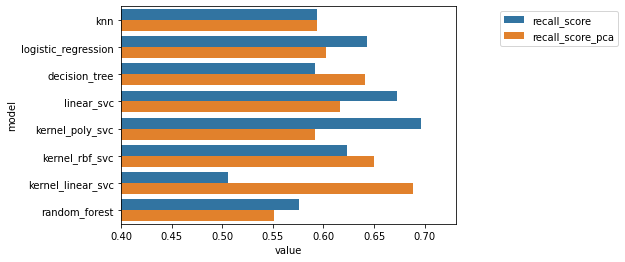

In [65]:
 import seaborn as sns
import matplotlib.pyplot as plt
combined_results_modified= pd.melt(combined_results.drop(['test_score','test_score_pca'],axis=1), id_vars= 'model')
ax = plt.subplot(111)
sns.barplot(data= combined_results_modified, x= 'value', y= 'model', hue= 'variable')
plt.xlim(0.4,None)
box = ax.get_position()
ax.legend(loc= 'upper right',bbox_to_anchor=(1.5,1))

Upon first glance, we see that there are three models that have a higher recall score after dimension reduction- Kernel SVC (linear) especially has a significant improvement.

### Model Results Comparison for:

(1) KNN model : The Recall scores remains unchanged with the PCA method.

(2) Logistic Regression model: the test score has improved with PCA method but the Recall Score has reduced from 0.64 to 0.60.

(3) Decision Tree: The model has improved with PCA method from 0.59 to 0.64 Recall Score.

(4) Linear SVC: The test score has improved with PCA method from 0.65 to 0.74 but the Recall Score has reduced from 0.67 to 0.62.

(5) Kernel SVC (poly): The Recall score has significantly reduced from 0.70 to 0.59 with PCA method.

(6) Kernel SVC (rbf): The recall score has slightly improved with the PCA method from 0.62 to 0.65. The test score remains unchanged.

(7) Kernel SVC (linear): The test score has slightly improved and the recall score has greatly improved from 0.50 to 0.69. 

(8) Random Forest: Both test score and recall score have slightly reduced with PCA method.


**Conclusion:** Using PCA has improved the Decision Tree and the Kernel SVC (rbf and linear), models.

## Deep Learning

Lastly we are building a deep learning model. For the model, we use Sequential() and add 2 hidden layers. We use Grid Search on Keras Clasiifier to find the best parameters- batch size and epochs.  

In [66]:
# from keras.models import Sequential

from tensorflow.keras import Sequential
from tensorflow.random import set_seed
from keras.layers import Dense
import numpy



In [67]:
from keras.wrappers.scikit_learn import KerasClassifier
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(20, input_dim=34, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Recall'])
    return model

In [68]:

set_seed(42)
#np.random.seed(10)

model_grid = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30] , 'epochs':[10, 50, 100],
              'class_weight':[{0: 1,1:w} for w in [1, 2, 3]]}
grid_search = GridSearchCV(estimator= model_grid, param_grid = param_grid, cv = 5, scoring='recall')

grid_search_result = grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)


{'batch_size': 30, 'class_weight': {0: 1, 1: 3}, 'epochs': 10}


The best parameters after the grid search is: batch_size: 30, class_weight: {0: 1, 1: 3}, epochs: 10. With these parameters we run the Deep Learning Model.

In [73]:
#fix random seed for reproducibility
#numpy.random.seed(10)
set_seed(42)

# create model
model = Sequential()
model.add(Dense(20, input_dim=34, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Recall', 'accuracy'])
model.fit(X_train, Y_train, epochs= 10, batch_size=30, verbose=0,class_weight={0:1,1:3})
dl_y_predict = model.predict(X_test)
scores = model.evaluate(X_test, Y_test)
print('Recall Score : {}'.format(scores[1]))


40/40 [==============================] - 0s 792us/step - loss: 0.6295 - recall: 0.7243 - accuracy: 0.7224
Recall Score : 0.7243345975875854


For the Deep Learning model, the Accuracy of the test set is 0.72 and the Recall score is 0.72. This model is performing better than the other models.

The best parameters for the Deep Learning model after Grid Search is- epochs: 10, batch_size: 20. With these parameters, the test score is 0.71 and the recall score is 0.73.

In [70]:
ensdl_results_df = ensdl_results_df.append({'model':'deep_learning','test_score':scores[2],'recall_score':scores[1]},ignore_index=True)


## Best Model Prediction

Finally, we check all the ensemble and deep learning model results to see which is giving the best recall value.

In [71]:
print('Ensemble and Deep Learning models')
ensdl_results_df

Ensemble and Deep Learning models


,model,test_score,recall_score
0,hard_voting_cls,0.7296,0.678707
1,soft_voting_cls,0.7504,0.629278
2,bagging_decision_tree,0.7664,0.615970
3,bagging_knn,0.7704,0.593156
4,pasting_decision_tree,0.7672,0.612167
5,pasting_knn,0.7632,0.566540
6,adaboost_decision_tree,0.7000,0.612167
7,adaboost_rf,0.7424,0.633080
8,gradient_boosting,0.7216,0.617871
9,deep_learning,0.7224,0.724335


Of all the models, including original and PCA models, the Deep Learning model is giving the best Recall Score of 0.72 with an accuracy score of 0.72. Hence Deep Learning is the best model. We run the model again.

In [74]:
set_seed(42)

# create model
model = Sequential()
model.add(Dense(20, input_dim=34, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Recall', 'accuracy'])
model.fit(X_train, Y_train, epochs= 10, batch_size=30, verbose=0,class_weight={0:1,1:3})
dl_y_predict = model.predict(X_test)
scores = model.evaluate(X_test, Y_test)
print('Accuracy Score : {}'.format(scores[2]))
print('Recall Score : {}'.format(scores[1]))

40/40 [==============================] - 0s 951us/step - loss: 0.6295 - recall: 0.7243 - accuracy: 0.7224
Accuracy Score : 0.7224000096321106
Recall Score : 0.7243345975875854
